In [1]:
'''
Code to reconstruct missing data in dataset/match_history.csv using average
score values for each country
'''
import csv
import matplotlib.pyplot as plt

HOME_FEATURE_INDEXES = [9, 17, 19, 20, 21]
AWAY_FEATURE_INDEXES = [10, 18, 22, 23, 24]
HOME_TEAM_FIFA_RANK = 5
AWAY_TEAM_FIFA_RANK = 6

def plot_fifa_score(original_data: str) -> []:
    '''
    Pull data from the given csv and plot 5 graphs, of score, offense score,
    defense score, midfield score and goalkeeper score against FIFA rank.
    '''
    result = []
    
    with open(original_data) as csv_in_file:
        csv_reader = csv.reader(csv_in_file)
        next(csv_reader) # Skip the column headers

        ranks = []
        # features = [scores, gk_scores, def_scores, off_scores, mid_scores]
        features = [[], [], [], [], []]
        plot_colours = ['b','r','g','y','m']
        plot_titles = ['Score', 'Goalkeeper', 'Defense', 'Offense', 'Midfield']

        for row in csv_reader:
            # Extract the 5 types of score from the given csv for
            home_features = [row[i] for i in HOME_FEATURE_INDEXES]
            away_features = [row[i] for i in AWAY_FEATURE_INDEXES]

            # Only append the data to the lists is it is fully intact
            if '' not in home_features and '' not in away_features:
                ranks.append(int(row[HOME_TEAM_FIFA_RANK]))
                ranks.append(int(row[AWAY_TEAM_FIFA_RANK]))
                for i in range(5):
                    features[i].append(float(home_features[i]))
                    features[i].append(float(away_features[i]))

        # Create a figure with 5 subplots - one for each type of score
        fig, axs = plt.subplots(5,1, constrained_layout=True)
        fig.suptitle('A plot of different score metrics by FIFA ranking')

        # Zip the data, colour and title lists for the subplots
        plot_data = zip(plot_colours, plot_titles, features)
        for i, data in enumerate(plot_data):
            # For each score, plot it against the corresponding FIFA ranking
            axs[i].scatter(ranks, data[2], s=10, c=data[0], marker='.')
            axs[i].set_title(f'{data[1]} by FIFA rank')
            axs[i].set_xlabel('FIFA rank')
            axs[i].set_ylabel('Score')

        plt.show()
        
        result.append(ranks)
        result.append(features)
        
        return result


def write_missing_data(original_data: str, reconstructed_data: str,
                        countries: dict) -> None:
    '''
    For each row in the input csv, write to the output csv filling in missisng
    values, with that countries average for that feature.
    '''

    with open(original_data) as csv_in_file, open(reconstructed_data, 'w') as csv_out_file:
        csv_reader = csv.reader(csv_in_file)
        csv_writer = csv.writer(csv_out_file)
        csv_writer.writerow(next(csv_reader))

        for row in csv_reader:
            for i, val in enumerate(row):
                if val == '':
                    if i in HOME_FEATURE_INDEXES:
                        replace_index = HOME_FEATURE_INDEXES.index(i)
                        row[i] = countries[row[1]][replace_index]
                    elif i in AWAY_FEATURE_INDEXES:
                        replace_index = AWAY_FEATURE_INDEXES.index(i)
                        row[i] = countries[row[2]][replace_index]
            csv_writer.writerow(row)


def get_averages(original_data: str) -> dict:
    '''
    Find average values for each 5 features for each country.
    '''

    countries = {}

    with open(original_data) as csv_file:
        csv_reader = csv.reader(csv_file)
        next(csv_reader)

        for row in csv_reader:
            home_country, away_country = row[1], row[2]
            home_features = [row[i] for i in HOME_FEATURE_INDEXES]
            away_features = [row[i] for i in AWAY_FEATURE_INDEXES]

            if home_country not in countries.keys():
                countries[home_country] = [[0.0, 0], [0.0, 0], [0.0, 0], [0.0, 0], [0.0, 0]]
            if away_country not in countries.keys():
                countries[away_country] = [[0.0, 0], [0.0, 0], [0.0, 0], [0.0, 0], [0.0, 0]]

            for i, val in enumerate(home_features):
                if val != '':
                    countries[home_country][i][0] += float(val)
                    countries[home_country][i][1] += 1

            for i, val in enumerate(away_features):
                if val != '':
                    countries[away_country][i][0] += float(val)
                    countries[away_country][i][1] += 1

        for country, value_list in countries.items():
            countries[country] = [round(val / max(1, count), 1) for [val, count] in value_list]

    return countries


def reconstruct(original_data: str, reconstructed_data: str) -> None:
    '''
    Reconstruct the missing data in original_data and write to new
    reconstructed_data csv.
    '''

    countries = get_averages(original_data)
    write_missing_data(original_data, reconstructed_data, countries)


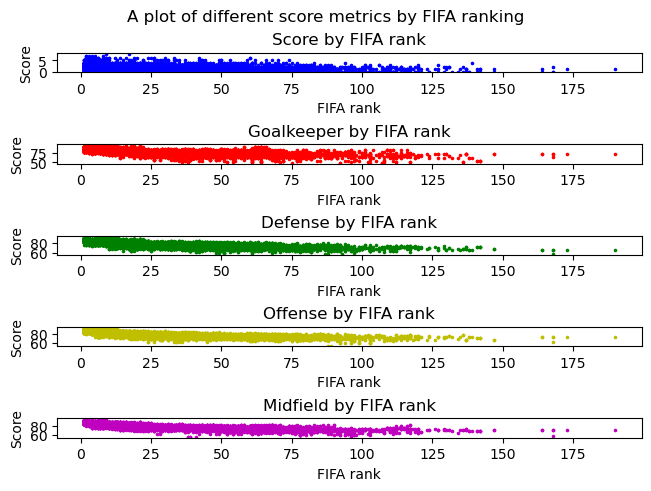

8232


In [2]:
# length of data == 8232 for both rank and pos_scores
data = []
reconstruct('match_history.csv', 'reconstructed_match_history.csv')
data = plot_fifa_score('match_history.csv')

print(len(data[0]))

In [3]:
import numpy as np

d = {'gk_score': [],
     'def_score': [],
     'mid_score': [],
     'atk_score': [],
    }

for i in range(8232):
    d['gk_score'].append([data[0][i],data[1][1][i]])
    d['def_score'].append([data[0][i],data[1][2][i]])
    d['mid_score'].append([data[0][i],data[1][3][i]])
    d['atk_score'].append([data[0][i],data[1][4][i]])

    
d['gk_score'] = np.array(d['gk_score']).astype(float)
d['def_score'] = np.array(d['def_score']).astype(float)
d['atk_score'] = np.array(d['atk_score']).astype(float)
d['mid_score'] = np.array(d['mid_score']).astype(float)

d
    
        

{'gk_score': array([[ 3., 94.],
        [67., 84.],
        [90., 83.],
        ...,
        [32., 78.],
        [12., 77.],
        [61., 76.]]),
 'def_score': array([[ 3. , 86.5],
        [67. , 80.2],
        [90. , 76.2],
        ...,
        [32. , 78. ],
        [12. , 75.8],
        [61. , 74.2]]),
 'mid_score': array([[ 3. , 89.3],
        [67. , 79.7],
        [90. , 73. ],
        ...,
        [32. , 81. ],
        [12. , 77.7],
        [61. , 77. ]]),
 'atk_score': array([[ 3. , 89.5],
        [67. , 81.8],
        [90. , 74. ],
        ...,
        [32. , 78. ],
        [12. , 75.8],
        [61. , 78. ]])}

In [4]:
f = np.hsplit(d['gk_score'],2)
rank = f[0]
pos = f[1]

print(pos)


[[94.]
 [84.]
 [83.]
 ...
 [78.]
 [77.]
 [76.]]


[ 3. 67. 90. ... 32. 12. 61.]
[[3.000e+00 9.000e+00]
 [6.700e+01 4.489e+03]
 [9.000e+01 8.100e+03]
 ...
 [3.200e+01 1.024e+03]
 [1.200e+01 1.440e+02]
 [6.100e+01 3.721e+03]]
Score: 0.3891226040167154


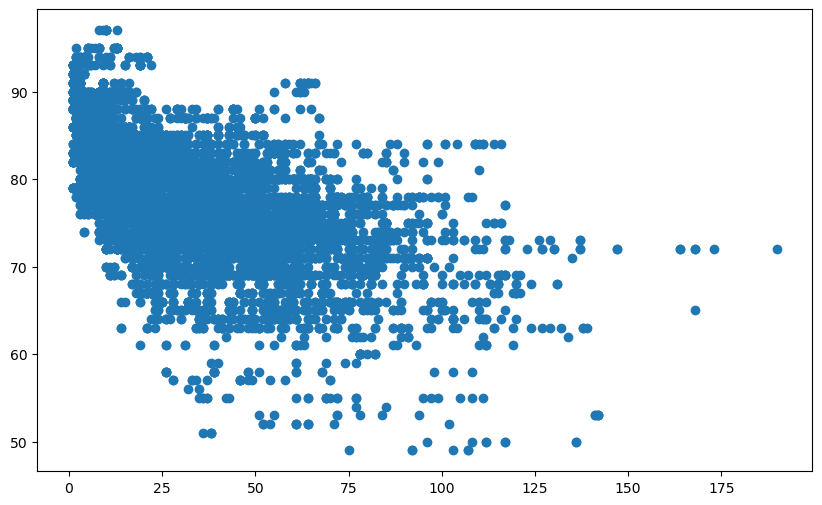

ValueError: X has 1 features, but LinearRegression is expecting 2 features as input.

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


def polr_model(data):
    x = np.array(data[0]).astype(float)
    print(x)
    y = data[1][1]
    
    poly = PolynomialFeatures(degree=2, include_bias=False)
    poly_features = poly.fit_transform(x.reshape(-1, 1))
    print(poly_features)
    
    train_input, test_input, train_target, test_target = train_test_split(
    poly_features, y, random_state=42)
    
    poly_reg_model = LinearRegression()
    poly_reg_model.fit(poly_features, y)
    print("Score: {}".format(poly_reg_model.score(test_input, test_target)))
    
    y_predicted = poly_reg_model.predict(poly_features)
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y)
    #plt.plot(x, y_predicted, c="red")
    plt.show()
    
    return poly_reg_model
    

pol = polr_model(data)
pol.predict(np.array(56).reshape(-1,1))

Score: 0.33987625660544674


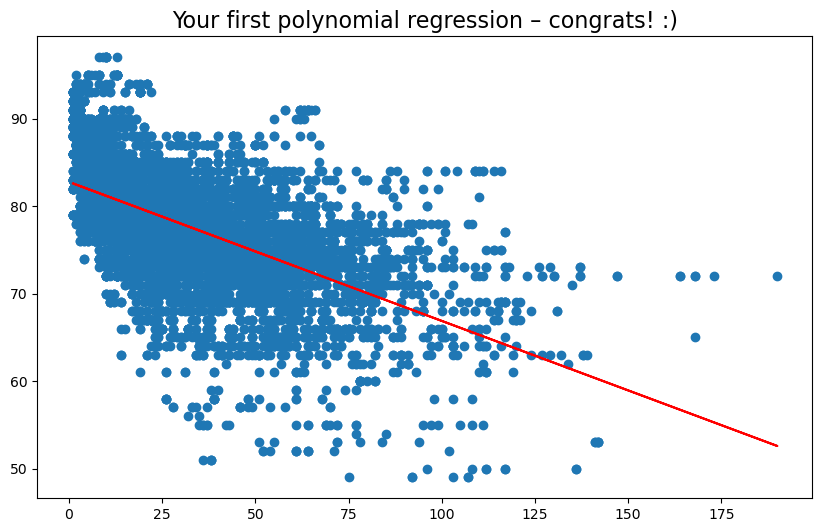

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

def lr_model(model_data):
    d = np.hsplit(model_data,2)
    rank = d[0]
    pos = d[1]
    
    train_input, test_input, train_target, test_target = train_test_split(
    rank, pos, random_state=42)
    
    lr = LinearRegression()

    lr.fit(train_input, train_target)
    print("Score: {}".format(lr.score(test_input, test_target)))
    
    y_predicted = lr.predict(rank)
    plt.figure(figsize=(10, 6))
    plt.title("Your first polynomial regression – congrats! :)", size=16)
    plt.scatter(rank, pos)
    plt.plot(rank, y_predicted, c="red")
    plt.show()
    
    return lr
    
l = lr_model(d['gk_score'])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(x.reshape(-1, 1))

poly_reg_model = LinearRegression()

poly_reg_model.fit(poly_features, y)
y_predicted = poly_reg_model.predict(poly_features)

plt.figure(figsize=(10, 6))
plt.title("Your first polynomial regression – congrats! :)", size=16)
plt.scatter(x, y)
plt.plot(x, y_predicted, c="red")
plt.show()